In [26]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
df=pd.read_csv('C:\Data\Custom\carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


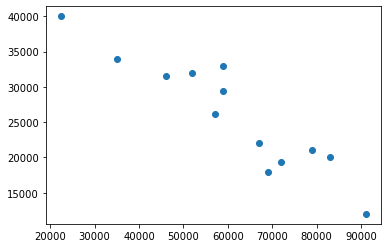

In [28]:
plt.scatter(df['Mileage'],df['Sell Price($)'])

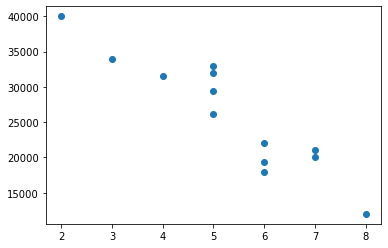

In [29]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

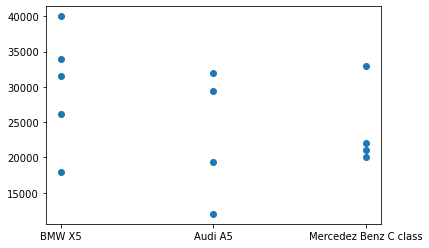

In [30]:
plt.scatter(df['Car Model'],df['Sell Price($)'])

## One Hot Encoding

In [31]:
x=df[['Car Model','Mileage','Age(yrs)']].values
y=df['Sell Price($)'].values

In [32]:
ct=ColumnTransformer([('Car Model', OneHotEncoder(),[0])],remainder='passthrough')
x=ct.fit_transform(x)

In [33]:
x

array([[0.0, 1.0, 0.0, 69000, 6],
       [0.0, 1.0, 0.0, 35000, 3],
       [0.0, 1.0, 0.0, 57000, 5],
       [0.0, 1.0, 0.0, 22500, 2],
       [0.0, 1.0, 0.0, 46000, 4],
       [1.0, 0.0, 0.0, 59000, 5],
       [1.0, 0.0, 0.0, 52000, 5],
       [1.0, 0.0, 0.0, 72000, 6],
       [1.0, 0.0, 0.0, 91000, 8],
       [0.0, 0.0, 1.0, 67000, 6],
       [0.0, 0.0, 1.0, 83000, 7],
       [0.0, 0.0, 1.0, 79000, 7],
       [0.0, 0.0, 1.0, 59000, 5]], dtype=object)

In [34]:
model=LinearRegression()

In [35]:
model.fit(x,y)

LinearRegression()

In [36]:
model.predict([[0,0,1,45000,4]])

array([36991.31721061])

In [37]:
model.predict([[0,1,0,86000,7]])

array([11080.7431322])

In [38]:
model.score(x,y)

0.9417050937281083

## Dummy variables 

In [39]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [40]:
dummy_var=pd.get_dummies(df['Car Model'])
dummy_var

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [41]:
new_df=pd.concat([df,dummy_var],axis=1)
new_df.drop(['Mercedez Benz C class','Car Model'],axis=1,inplace=True)
new_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [42]:
model2=LinearRegression()

In [43]:
model2.fit(new_df.drop('Sell Price($)',axis=1),new_df['Sell Price($)'])

LinearRegression()

In [44]:
model2.predict([[45000,4,0,0]])

array([36991.31721061])

In [45]:
model2.predict([[86000,7,0,1]])

array([11080.74313219])

In [46]:
model2.score(new_df.drop('Sell Price($)',axis=1),new_df['Sell Price($)'])

0.9417050937281083

## Label Encoder 

In [47]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [48]:
x=df.drop('Sell Price($)',axis=1)
y=df['Sell Price($)']

In [51]:
le=LabelEncoder()
x['Car Model']=le.fit_transform(x['Car Model'])
x

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [53]:
model3=LinearRegression()
model3.fit(x,y)

LinearRegression()

In [54]:
model3.score(x,y)

0.8719970367825952

In [55]:
model2.predict([[45000,4,0,0]])

array([36991.31721061])

In [56]:
model2.predict([[86000,7,0,1]])

array([11080.74313219])